Dataset Shape: (4140, 18)
Price Range: $0 to $26,590,000
Average Price: $553,063


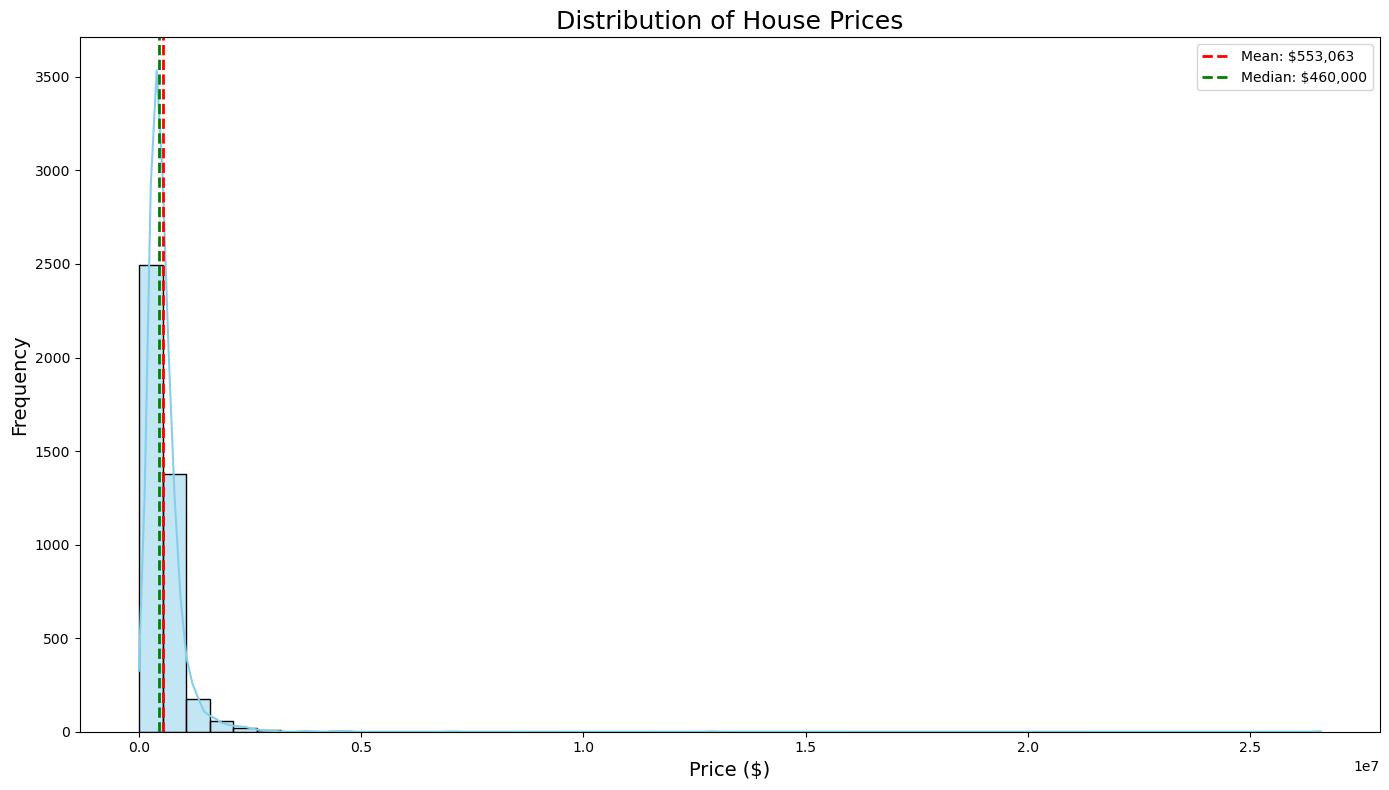

NameError: name 'stats' is not defined

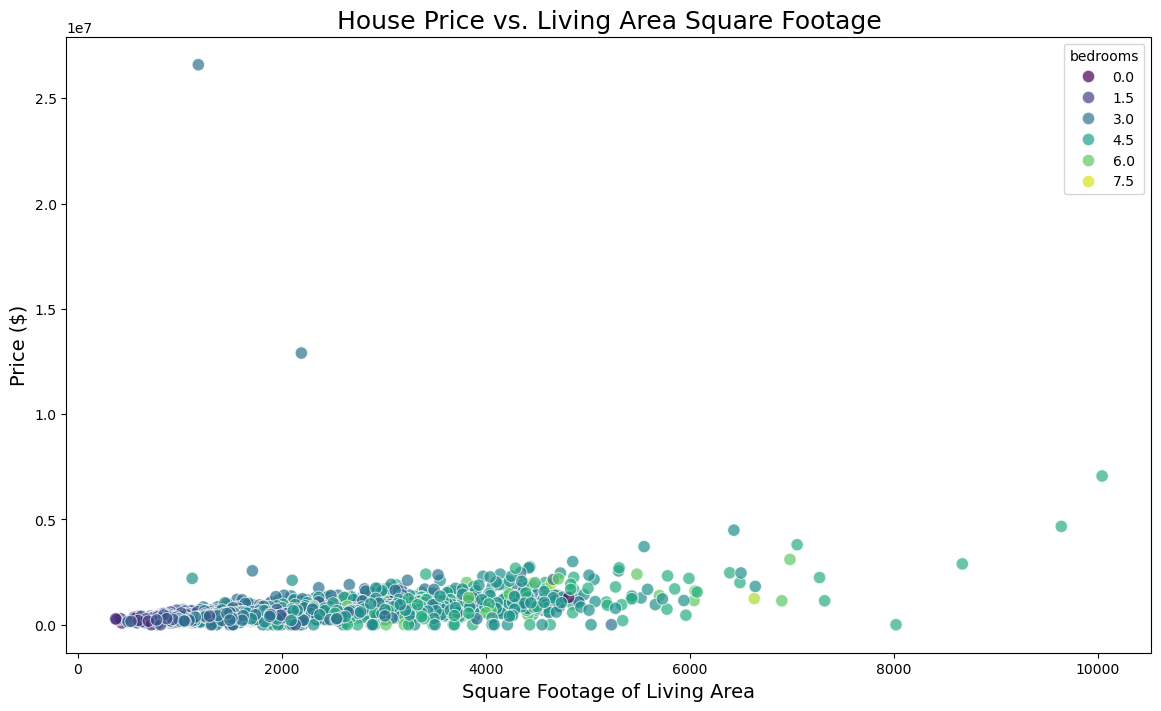

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set visualization style
# plt.style.use('seaborn')
# sns.set(style="whitegrid", font_scale=1.2)
# plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset
df = pd.read_csv('USA_Housing_Dataset.csv')

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Basic data exploration
print(f"Dataset Shape: {df.shape}")
print(f"Price Range: ${df['price'].min():,.0f} to ${df['price'].max():,.0f}")
print(f"Average Price: ${df['price'].mean():,.0f}")

# CHART 1: Distribution of House Prices
plt.figure(figsize=(14, 8))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of House Prices', fontsize=18)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(df['price'].mean(), color='red', linestyle='dashed', linewidth=2, 
           label=f'Mean: ${df["price"].mean():,.0f}')
plt.axvline(df['price'].median(), color='green', linestyle='dashed', linewidth=2, 
           label=f'Median: ${df["price"].median():,.0f}')
plt.legend()
plt.tight_layout()
plt.show()

# CHART 2: Relationship between Square Footage and Price
plt.figure(figsize=(14, 8))
sns.scatterplot(x='sqft_living', y='price', data=df, hue='bedrooms', 
               palette='viridis', alpha=0.7, s=80)
plt.title('House Price vs. Living Area Square Footage', fontsize=18)
plt.xlabel('Square Footage of Living Area', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)

# Add regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df['sqft_living'], df['price'])
plt.plot(df['sqft_living'], intercept + slope*df['sqft_living'], 'r', linewidth=2, 
         label=f'Regression Line (R² = {r_value**2:.2f})')
plt.legend(title='Bedrooms')
plt.tight_layout()
plt.show()

# CHART 3: Average Price by Number of Bedrooms
plt.figure(figsize=(14, 8))
# Focus on common bedroom counts (1-7)
bedroom_df = df[df['bedrooms'] <= 7]
avg_price_by_bedroom = bedroom_df.groupby('bedrooms')['price'].mean().reset_index()
ax = sns.barplot(x='bedrooms', y='price', data=avg_price_by_bedroom, palette='Blues_d')
plt.title('Average House Price by Number of Bedrooms', fontsize=18)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)

# Add value labels on bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'${p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height() + 50000),
                ha='center', va='bottom', fontsize=11)
plt.tight_layout()
plt.show()

# CHART 4: Correlation Heatmap
plt.figure(figsize=(16, 12))
# Select numerical columns
numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 
                 'sqft_basement', 'yr_built', 'yr_renovated']
corr = df[numerical_cols].corr()
# Create mask for upper triangle to avoid redundancy
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', 
           linewidths=0.5, center=0, square=True)
plt.title('Correlation Matrix of Housing Features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Dataset Shape: (4140, 18)

Running Linear Regression...

Linear Regression Performance:
RMSE: $3989961628549073.00
R²: -109812829106509299712.0000

Running Random Forest...

Random Forest Performance:
RMSE: $272266.95
R²: 0.4887

Running Gradient Boosting...

Gradient Boosting Performance:
RMSE: $290360.70
R²: 0.4184

Running Support Vector Regression...

Support Vector Regression Performance:
RMSE: $388256.10
R²: -0.0398

Model Comparison:
               Model          RMSE            R²
1      Random Forest  2.722669e+05  4.886650e-01
2  Gradient Boosting  2.903607e+05  4.184443e-01
3                SVR  3.882561e+05 -3.980578e-02
0  Linear Regression  3.989962e+15 -1.098128e+20


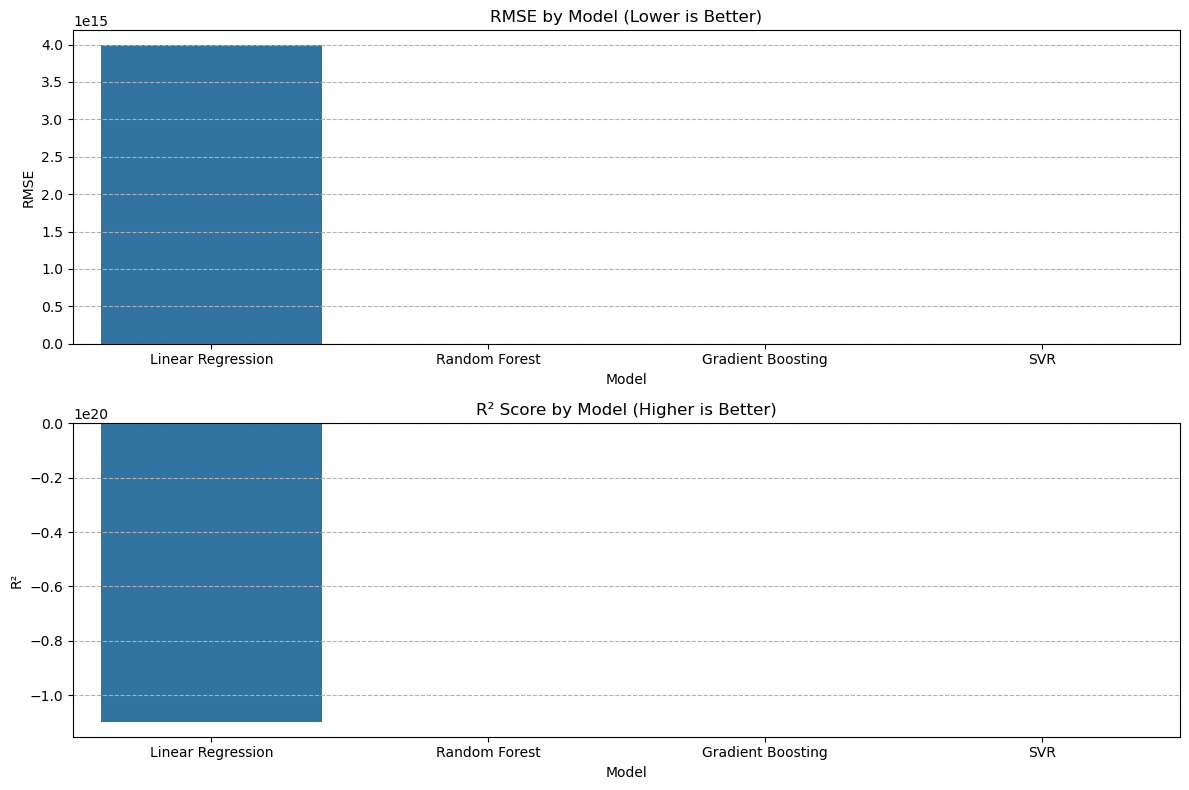

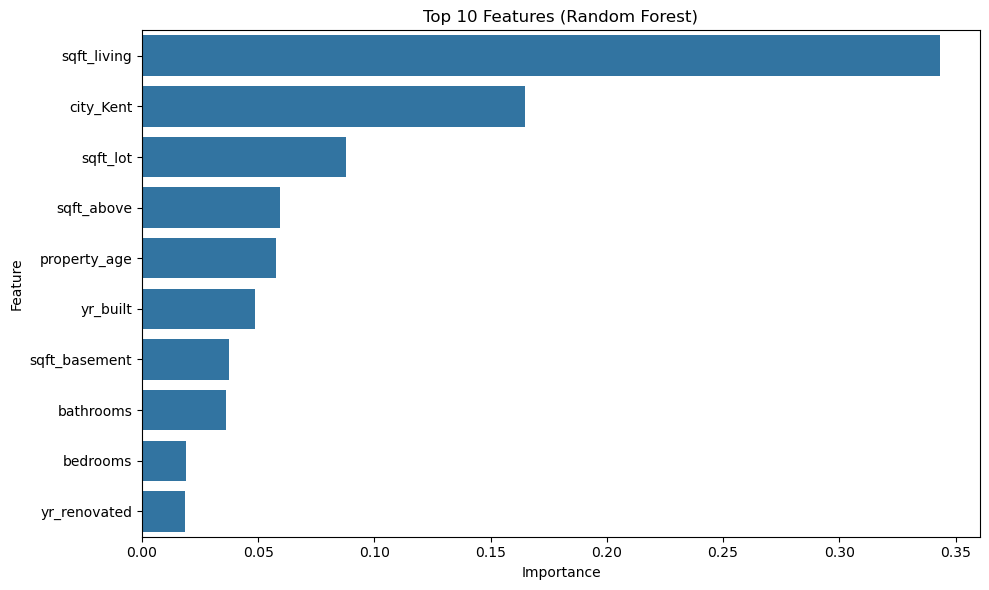


Best model: Random Forest
RMSE: $272266.95
R²: 0.4887


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
df = pd.read_csv('USA_Housing_Dataset.csv')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Print basic info
print(f"Dataset Shape: {df.shape}")

# Data preprocessing
# Handle missing values
df['price'] = df['price'].fillna(df['price'].median())
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# Feature engineering
# Extract year and month from date
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month

# Calculate property age
df['property_age'] = df['sale_year'] - df['yr_built']

# Has basement feature
df['has_basement'] = (df['sqft_basement'] > 0).astype(int)

# Encode categorical variables
df = pd.get_dummies(df, columns=['city'], drop_first=True)

# Drop non-numeric columns
columns_to_drop = ['date', 'street', 'statezip', 'country']
df = df.drop(columns=columns_to_drop)

# Split features and target
X = df.drop('price', axis=1)
y = df['price']

# Split into train and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate model performance
def evaluate_model(model, X_train_data, X_test_data, y_train_data, y_test_data, name):
    # Train the model
    model.fit(X_train_data, y_train_data)
    
    # Make predictions
    y_pred = model.predict(X_test_data)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test_data, y_pred))
    r2 = r2_score(y_test_data, y_pred)
    
    print(f"\n{name} Performance:")
    print(f"RMSE: ${rmse:.2f}")
    print(f"R²: {r2:.4f}")
    
    return rmse, r2

# 1. Linear Regression
print("\nRunning Linear Regression...")
lr_model = LinearRegression()
lr_rmse, lr_r2 = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Linear Regression")

# 2. Random Forest
print("\nRunning Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_rmse, rf_r2 = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# 3. Gradient Boosting
print("\nRunning Gradient Boosting...")
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_rmse, gb_r2 = evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting")

# 4. Support Vector Regression
print("\nRunning Support Vector Regression...")
svr_model = SVR(kernel='rbf')
svr_rmse, svr_r2 = evaluate_model(svr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Support Vector Regression")

# Create results dataframe
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR']
rmse_values = [lr_rmse, rf_rmse, gb_rmse, svr_rmse]
r2_values = [lr_r2, rf_r2, gb_r2, svr_r2]

results_df = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_values,
    'R²': r2_values
})

print("\nModel Comparison:")
print(results_df.sort_values('RMSE'))

# Visualize model comparison
plt.figure(figsize=(12, 8))

# Plot RMSE comparison
plt.subplot(2, 1, 1)
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('RMSE by Model (Lower is Better)')
plt.grid(axis='y', linestyle='--')

# Plot R² comparison
plt.subplot(2, 1, 2)
sns.barplot(x='Model', y='R²', data=results_df)
plt.title('R² Score by Model (Higher is Better)')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

# Feature importance for Random Forest (typically one of the best models)
if hasattr(rf_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False).head(10)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Top 10 Features (Random Forest)')
    plt.tight_layout()
    plt.show()

# Print conclusion
best_model_idx = np.argmin(rmse_values)
print(f"\nBest model: {models[best_model_idx]}")
print(f"RMSE: ${rmse_values[best_model_idx]:.2f}")
print(f"R²: {r2_values[best_model_idx]:.4f}")
